In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import ipdb
import glob
import itertools
import numpy.ma as ma
from utils import u_statistics as u_stat
from scipy.stats import gaussian_kde
import pickle as pkl
from utils import u_plot as uplot
from scipy.stats import gaussian_kde, linregress
import pandas as pd

##for regridding, install xesmf:
# conda install esmpy
# pip install xesmf
from utils import constants as cnst

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


Loads bulk statistics derived from having cut out storms (saved in MCSfiles), OBS includes rainfall from TRMM radar

In [3]:
# those three are created from storm cut out kernels (storm netcdf files needed!)

CP4 = pkl.load( open (cnst.CLOVER_SAVES + 'bulk_-50_5000km2_CP4_ERA-I.p', 'rb'))#'bulk_-50_5000km2_CP4_ERA-I.p'
CP42 = pkl.load( open (cnst.CLOVER_SAVES + 'bulk_-50_5000km2_CP4_ERA-I_13km.p', 'rb'))
#CP43 = pkl.load( open (cnst.CLOVER_SAVES + 'bulk_-50_5000km2_CP4_ERA-I_13km.p', 'rb'))
#CP25 = pkl.load( open (cnst.CLOVER_SAVES + 'bulk_-50_zeroRain_gt1k_shear_CP25.p', 'rb'))
CP25 = pkl.load( open (cnst.CLOVER_SAVES + 'bulk_-50_5000km2_CP25_ERA-I.p', 'rb'))
OBS2 = pkl.load( open (cnst.CLOVER_SAVES + 'bulk_-40_zeroRain_gt5k_-40thresh_OBSera.p', 'rb'))
OBS = pkl.load( open (cnst.CLOVER_SAVES + 'bulk_-50_5000km2_GPM_ERA-I.p', 'rb'))

In [4]:
print(OBS.keys())

dict_keys(['t925', 'area', 'u925', 'p', 't650', 'rh650', 'pmean', 't', 'lon', 'w925', 'year', 'div650', 'q925', 'pv650', 'w650', 'clon', 'pmax', 'rh925', 'month', 'div925', 'tmean', 'pv925', 'pgt30', 'clat', 'lat', 'q650', 'v650', 'tmin', 'hour', 'shear', 'v925', 'u650', 'pgt01isvalid'])


In [462]:
np.min(OBS['area'])

3

In [766]:
dic = OBS

pp = np.array(dic['pmax'])
sh = np.array(dic['u650'])#np.array(dic['shear']) #np.array(dic['shear']) * (-1)
umin = np.array(dic['u650'])
umax = np.array(dic['u925'])
qq = np.array(dic['q925']) 
tt = np.array(dic['tmin'])
ttm = np.array(dic['tmean'])
month = np.array(dic['month'])
area = np.array(dic['area'])
lat = np.array(dic['clat'])
lon = np.array(dic['clon'])

obs_pcp = {
    'prcp' : pp,
    'u650' : umin,
    'u925' : umax,
    'q925' : qq*1000,
    'shear' : sh*-1,
    'month' : month,
    'area' : area*7.7**2,
    'tmin' : tt,
    'tmean' : ttm,
    'lat' : lat,
    'lon' : lon,
} 
obs = pd.DataFrame(obs_pcp)

In [767]:
dic = OBS2

pp = np.array(dic['pmax'])
sh = np.array(dic['shear']) #np.array(dic['shear']) * (-1)
umin = np.array(dic['u650'])
umax = np.array(dic['u925'])
qq = np.array(dic['q925']) 
tt = np.array(dic['tmin'])
ttm = np.array(dic['tmean'])
month = np.array(dic['month'])
area = np.array(dic['area'])
lat = np.array(dic['clat'])
lon = np.array(dic['clon'])

obs_pcp = {
    'prcp' : pp,
    'u650' : umin,
    'u925' : umax,
    'q925' : qq*1000,
    'shear' : sh*-1,
    'month' : month,
    'area' : area*7.7**2,
    'tmin' : tt,
    'tmean' : ttm,
    'lat' : lat,
    'lon' : lon,
} 
obs_trmm = pd.DataFrame(obs_pcp)

In [768]:
dic.keys()

dict_keys(['pmean', 'pv650', 't925', 'pgt30', 'rh925', 'div650', 'div925', 'p', 'q925', 'pgt01isvalid', 'lon', 'pmax', 'shear', 't650', 'year', 'w925', 'q650', 'u650', 'v925', 'rh650', 't', 'u925', 'w650', 'area', 'clon', 'month', 'v650', 'pv925', 'lat', 'tmin', 'tmean', 'clat', 'hour'])

In [769]:
dic = CP4

pp = np.array(dic['pmax'])
sh = np.array(dic['shearmin']) #np.array(dic['shear']) * (-1)
umin = np.array(dic['umin_mid'])
umax = np.array(dic['umax_srfc'])
qq = np.array(dic['qmax']) 
tt = np.array(dic['tmin'])
ttm = np.array(dic['tmean'])
month = np.array(dic['month'])
area = np.array(dic['area'])
lat = np.array(dic['clat'])
lon = np.array(dic['clon'])

cp4_dic = {
    'prcp' : pp,
    'u650' : umin,
    'u925' : umax,
    'q925' : qq,
    'shear' : sh*-1,
    'month' : month,
    'area' : area*4.4**2,
    'tmin' : tt,
    'tmean' : ttm,
    'lat' : lat,
    'lon' : lon,
} 
cp4_25km = pd.DataFrame(cp4_dic)

In [770]:
dic = CP42

pp = np.array(dic['pmax'])
sh = np.array(dic['shearmin']) #np.array(dic['shear']) * (-1)
umin = np.array(dic['umin_mid'])
umax = np.array(dic['umax_srfc'])
qq = np.array(dic['qmax']) 
tt = np.array(dic['tmin'])
ttm = np.array(dic['tmean'])
month = np.array(dic['month'])
area = np.array(dic['area'])
lat = np.array(dic['clat'])
lon = np.array(dic['clon'])

cp4_dic = {
    'prcp' : pp,
    'u650' : umin,
    'u925' : umax,
    'q925' : qq,
    'shear' : sh*-1,
    'month' : month,
    'area' : area*4.4**2,
    'tmin' : tt,
    'tmean' : ttm,
    'lat' : lat,
    'lon' : lon,
} 
cp4 = pd.DataFrame(cp4_dic)

In [771]:
dic = CP25

pp = np.array(dic['pmax'])
sh = np.array(dic['shearmin']) #np.array(dic['shear']) * (-1)
umin = np.array(dic['umin_mid'])
umax = np.array(dic['umax_srfc'])
qq = np.array(dic['qmax']) 
tt = np.array(dic['tmin'])
ttm = np.array(dic['tmean'])
month = np.array(dic['month'])
area = np.array(dic['area'])
lat = np.array(dic['clat'])
lon = np.array(dic['clon'])

cp25_dic = {
    'prcp' : pp,
    'u650' : umin,
    'u925' : umax,
    'q925' : qq*1000,
    'shear' : sh*-1,
    'month' : month,
    'area' : area*25**2,
    'tmin' : tt,
    'tmean' : ttm,
    'lat' : lat,
    'lon' : lon,
} 
cp25 = pd.DataFrame(cp25_dic)

(array([  30.,  318.,  953., 2029., 2487., 2445., 1822., 1045.,  408.,
          86.]), array([-99.48057942, -94.59304836, -89.7055173 , -84.81798624,
        -79.93045518, -75.04292412, -70.15539306, -65.267862  ,
        -60.38033094, -55.49279988, -50.60526882]), <a list of 10 Patch objects>)

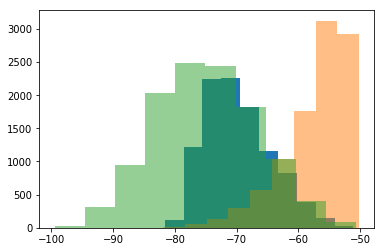

In [772]:
plt.hist(cp4.tmin)
plt.hist(cp25.tmin, alpha=0.5)
plt.hist(obs.tmin, alpha=0.5)

In [773]:
cp4.shear

0        17.249976
1        14.875000
2        18.999994
3        20.624994
4         8.750003
5        17.249765
6        15.124991
7        19.749906
8        21.749975
9        23.875000
10       16.000000
11       24.124976
12       15.370476
13       17.249988
14       15.000003
15       15.374370
16       10.250037
17       13.374994
18       15.749960
19       18.750000
20       13.874993
21       22.124773
22       11.624979
23       16.875000
24       15.999935
25       16.125004
26       12.999988
27       11.500000
28       17.250000
29       13.249978
           ...    
10172    14.500004
10173    11.500000
10174    10.249991
10175    12.249962
10176     5.999996
10177     8.250000
10178     8.749868
10179     8.125000
10180    12.249860
10181    11.374985
10182    12.874921
10183     6.750000
10184    10.999987
10185     8.121716
10186     7.375000
10187     7.750000
10188     9.250000
10189     9.249929
10190     5.500000
10191     6.125053
10192    11.999953
10193     2.

In [774]:
def density(v1,v2):
    xy = np.vstack([v1, v2])
    z = gaussian_kde(xy)(xy)
    data = z / (z.max() - z.min())
    
    return data

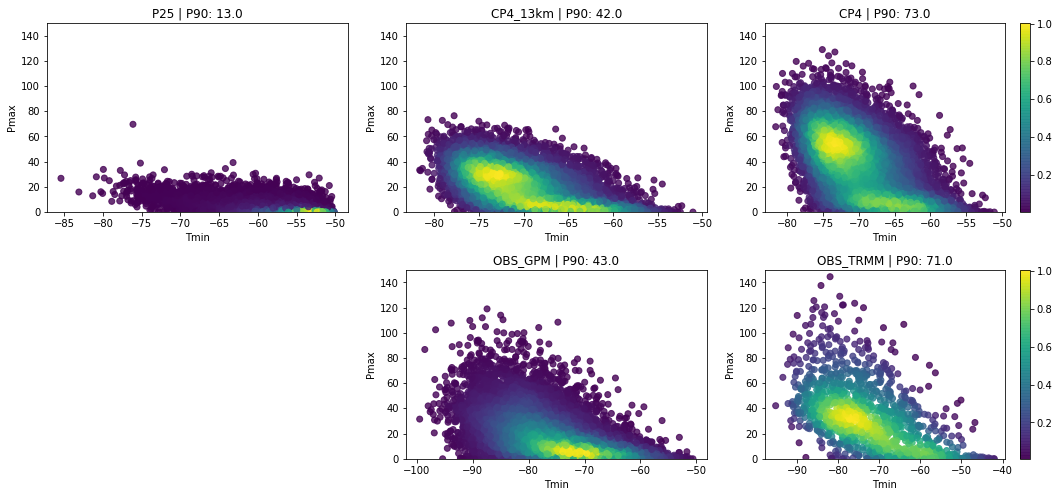

In [775]:
pupper=150
perc = 90
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(331)
plt.xlabel('Tmin')
plt.ylabel('Pmax')
isq = (cp25.shear>0)
v1 = cp25.where(isq).tmin.dropna()
v2 = cp25.where(isq).prcp.dropna()
plt.title('P25 | P'+str(perc)+': '+str(np.round(np.percentile(v2[v2>=0.1],perc))))
data = density(v1,v2)
plt.scatter(v1, v2, alpha=0.8, c=data, cmap='viridis')

ax.set_ylim(0,pupper)

ax = f.add_subplot(332)
isqq = (cp4.shear>0) & np.isfinite(cp4.prcp)
v1 = cp4.where(isqq).tmin.dropna()
v2 = cp4.where(isqq).prcp.dropna()
#ipdb.set_trace()
data = density(v1,v2)
plt.scatter(v1, v2, alpha=0.8, c=data)
plt.xlabel('Tmin')
plt.title('CP4_13km | P'+str(perc)+': '+str(np.round(np.percentile(v2[v2>=0.1],perc))))
plt.ylabel('Pmax')
ax.set_ylim(0,pupper)

ax = f.add_subplot(333)
isqq = (cp4_25km.shear>0) & np.isfinite(cp4_25km.prcp)
v1 = cp4_25km.where(isqq).tmin.dropna()
v2 = cp4_25km.where(isqq).prcp.dropna()
#ipdb.set_trace()
data = density(v1,v2)
plt.scatter(v1, v2, alpha=0.8, c=data)
plt.xlabel('Tmin')
plt.title('CP4 | P'+str(perc)+': '+str(np.round(np.percentile(v2[v2>=0.1],perc))))
plt.ylabel('Pmax')
ax.set_ylim(0,pupper)
plt.colorbar()

ax = f.add_subplot(335)
isqq = (obs.shear>0) & np.isfinite(obs.prcp)
v1 = obs.where(isqq).tmin.dropna()
v2 = obs.where(isqq).prcp.dropna()
#ipdb.set_trace()
data = density(v1,v2)
plt.scatter(v1, v2, alpha=0.8, c=data)
plt.xlabel('Tmin')
plt.title('OBS_GPM | P'+str(perc)+': '+str(np.round(np.percentile(v2[v2>=0.1],perc))))
plt.ylabel('Pmax')
ax.set_ylim(0,pupper)

ax = f.add_subplot(336)
isqq = (obs_trmm.shear>0) & np.isfinite(obs_trmm.prcp)
v1 = obs_trmm.where(isqq).tmin.dropna()
v2 = obs_trmm.where(isqq).prcp.dropna()
#ipdb.set_trace()
data = density(v1,v2)
plt.scatter(v1, v2, alpha=0.8, c=data)
plt.xlabel('Tmin')
plt.title('OBS_TRMM | P'+str(perc)+': '+str(np.round(np.percentile(v2[v2>=0.1],perc))))
plt.ylabel('Pmax')
ax.set_ylim(0,pupper)
plt.colorbar()

plt.tight_layout()
f.savefig(cnst.network_data + 'figs/CLOVER/CP4/TminVSPrecip_stormsComparison_5000km2_-50_pmax_shearmean.png')


In [776]:
len(obs)

11623

Text(0.5, 1.0, '-0.21')

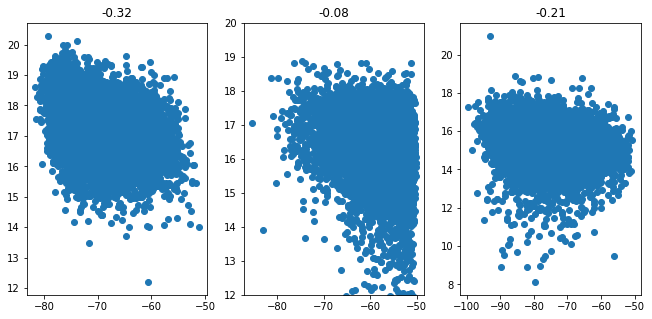

In [777]:
cp4s = [cp4.tmin, cp4.q925]
cp25s = [cp25.tmin, cp25.q925]
obss = [obs.tmin, obs.q925]


f = plt.figure(figsize=(11,5))
ax = f.add_subplot(131)
r = stats.pearsonr(cp4s[0],cp4s[1])
plt.scatter(cp4s[0],cp4s[1])
plt.title(str(np.round(r[0], decimals=2)))

ax = f.add_subplot(132)
plt.scatter(cp25s[0],cp25s[1])
r = stats.pearsonr(cp25s[0],cp25s[1])
plt.title(str(np.round(r[0], decimals=2)))
ax.set_ylim(12,20)

ax = f.add_subplot(133)
plt.scatter(obss[0],obss[1])
r = stats.pearsonr(obss[0],obss[1])
plt.title(str(np.round(r[0], decimals=2)))
#ax.set_ylim(0,150)
#ax.set_ylim(13,19)


In [778]:
def get_ERA(era, indic):

    dic = {}
    dic['u925'] = []
    dic['u650'] = []
    dic['q925'] = []
    dic['q700'] = []
    dic['q_low'] = []
    dic['q_up'] = []
    
    for id, date in enumerate(indic.date):

        getera =np.where((era['time.day']==(indic['date'])[id].day) & (era['time.month']==indic.month[id]) & (era['time.year']==indic.year[id]))

        try:
            era_day = era.isel(time=int(getera[0]))
        except TypeError:
            print('Era missing')
            dic['u925'].append(np.nan)
            dic['u650'].append(np.nan)
            dic['q925'].append(np.nan)
            dic['q700'].append(np.nan)

            continue

        elat = indic.clat[id]
        elon = indic.clon[id]
        dic['u925'].append(float(era_day['u'].sel(latitude=elat, longitude=elon, level=925, method='nearest').values))
        dic['u650'].append(float(era_day['u'].sel(latitude=elat, longitude=elon, level=650, method='nearest').values))
        dic['q925'].append(float(era_day['q'].sel(latitude=elat, longitude=elon, level=925, method='nearest').values))
        dic['q700'].append(float(era_day['q'].sel(latitude=elat, longitude=elon, level=700, method='nearest').values))

    return dic

In [779]:
pdf = pkl.load(open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA.p', 'rb'))
pdf = pdf.where((pdf.clat>=4.5) & (pdf.clat<=8.5) & (pdf.clon>=-12) & (pdf.clon<=12))
pdf = pdf.dropna()

ttg = np.array(pdf.tmin, dtype=float)
ttm = np.array(pdf.tmean, dtype=float)
month = pdf.month.values
area = pdf.area.values
area70 = np.array(pdf['70area'], dtype=int)
lat = pdf.clat.values
lon = pdf.clon.values

In [780]:
#era = xr.open_dataset(cnst.ERA_DAILY_PL12UTC)

In [781]:
#era_out = get_ERA(era, pdf)
#pkl.dump(era_out,open(cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA.p', 'wb'))

In [782]:
era_out = pkl.load( open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA.p', 'rb'))
#era_out = pkl.load( open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_allmonth_2000-2014_18UTC_front.p', 'rb'))#

In [783]:
pdf

,date,month,year,area,70area,minlon,minlat,maxlon,maxlat,clon,clat,tmin,tmean,t10,t90
1983-02-11_18:00:00_5,1983-02-11 18:00:00,2.0,1983.0,84.0,0.0,-8.569992,5.529999,-7.729996,6.300003,-8.149994,5.915001,-68.659988,-57.395599,-64.319992,-64.319992
1983-02-14_18:00:00_10,1983-02-14 18:00:00,2.0,1983.0,280.0,22.0,-6.259995,5.739998,-4.300003,6.860001,-5.279999,6.299999,-73.169998,-60.815533,-68.659988,-68.659988
1983-02-14_18:00:00_11,1983-02-14 18:00:00,2.0,1983.0,782.0,286.0,-4.229996,6.650002,-1.009995,9.590004,-2.619995,8.120003,-80.009995,-65.006989,-74.809998,-74.809998
1983-02-14_18:00:00_12,1983-02-14 18:00:00,2.0,1983.0,144.0,2.0,-8.429993,7.209999,-6.610001,8.330002,-7.519997,7.770000,-71.659988,-56.381798,-62.970001,-62.970001
1983-02-16_18:00:00_2,1983-02-16 18:00:00,2.0,1983.0,185.0,20.0,-1.360001,5.809998,-0.100006,6.930000,-0.730003,6.369999,-73.169998,-63.902752,-70.089996,-70.089996
1983-02-17_18:00:00_1,1983-02-17 18:00:00,2.0,1983.0,414.0,29.0,-8.569992,4.760002,-5.770004,6.090004,-7.169998,5.425003,-73.169998,-60.206539,-68.659988,-68.659988
1983-02-17_18:00:00_2,1983-02-17 18:00:00,2.0,1983.0,177.0,35.0,-2.479996,5.389999,-0.940002,6.300003,-1.709999,5.845001,-74.809998,-63.201801,-71.659988,-71.659988
1983-02-17_18:00:00_3,1983-02-17 18:00:00,2.0,1983.0,116.0,10.0,5.289993,6.720001,6.270004,7.699997,5.779999,7.209999,-70.089996,-62.256889,-68.659988,-68.659988
1983-02-18_18:00:00_10,1983-02-18 18:00:00,2.0,1983.0,217.0,0.0,-2.899994,6.510002,-1.779999,8.050003,-2.339996,7.280003,-67.019989,-58.657185,-62.970001,-62.970001
1983-02-18_18:00:00_11,1983-02-18 18:00:00,2.0,1983.0,202.0,13.0,3.960007,6.930000,5.430008,7.840004,4.695007,7.385002,-76.529999,-62.504749,-68.659988,-68.659988


In [784]:
e_u650 = np.array(era_out['u650'])
e_u925 = np.array(era_out['u925'])
e_q925 = np.array(era_out['q925'])
e_q700 = np.array(era_out['q700'])

In [785]:
dic = {
    'u650' : e_u650,
    'u925' : e_u925,
    'q925' : e_q925*1000,
    'q700' : e_q700*1000,
    'shear' : e_u925, #(e_u650-e_u925)*-1,
    'month' : month,
    'area' : area*7.7**2,
    'area70' : area70*7.7**2,
    'tmin' : ttg,
    'tmean' : ttm,
    'lat' : lat,
    'lon' : lon,
} 
ds = pd.DataFrame(dic)

In [786]:
ds = ds.dropna()

In [787]:
lt=7

pos1 = ((ds.month>=9) | (ds.month<=lt))  & (ds.u650<0) #& (ds.area>=5000) # all storms, without trmm overpass - matchup via storm centre points
opos1 =((obs.month>=9) | (obs.month<=lt)) & (obs.u650<0)# & (obs.area>=5000) # storms with trmm overpass - matchup via cutout kernels
cpos1 = ((cp4.month>=9) | (cp4.month<=lt))  & (cp4.u650<0) #& (cp4.area>=5000)# & (cp4.prcp>=0)  #cp4
cpos125 = ((cp25.month>=9) | (cp25.month<=lt))  & (cp25.u650<0)# & (cp25.area>=5000) #& (cp25.prcp>=0) # p25

In [788]:
np.sum(opos1)

9902

In [789]:
oposi = (obs.u650<0) &  (obs.prcp>=0.5) & ((obs.month>=9) | (obs.month<=lt))
cposi4 = (cp4.u650<0) &  (cp4.prcp>=0.5) & ((cp4.month>=9) | (cp4.month<=lt))
cposi25 =(cp25.u650<0) &  (cp25.prcp>=0.1) & ((cp25.month>=9) | (cp25.month<=lt))
print(np.sum(oposi))
print(np.sum(cposi4))
print(np.sum(cposi25))

9216
9192
5865


In [790]:
ds_march = ds[pos1]
obs_march = obs[opos1]
cp4_march = cp4[cpos1]
cp25_march = cp25[cpos125]

In [791]:
obsp = obs[oposi]
cp4p = cp4[cposi4]
cp25p = cp25[cposi25]

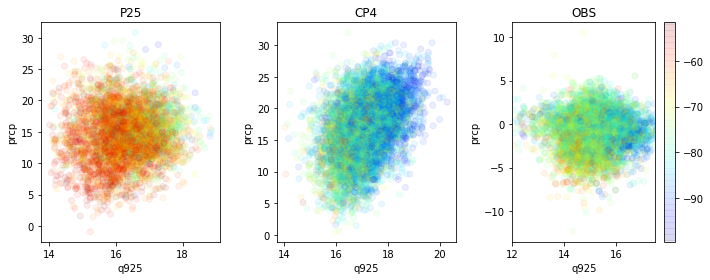

In [705]:
f = plt.figure(figsize=(10,4))
ax = f.add_subplot(131)
plt.xlabel('q925')
plt.ylabel('prcp')
plt.title('P25')
isq = cp25p.q925>14
isqq = cp4p.q925>14
plt.scatter(cp25p.where(isq).q925, cp25p.where(isq).shear, c=cp25p.where(isq).tmin, alpha=0.08, cmap='jet')

ax = f.add_subplot(132)
plt.scatter(cp4p.where(isqq).q925, cp4p.where(isqq).shear, c=cp4p.where(isqq).tmin, alpha=0.08, cmap='jet')
plt.xlabel('q925')
plt.title('CP4')
plt.ylabel('prcp')
#ax.set_ylim(0,150)

ax = f.add_subplot(133)
isqq = obsp.q925>12
plt.scatter(obsp.where(isqq).q925, obsp.where(isqq).shear, c=obsp.where(isqq).tmin, alpha=0.08, cmap='jet')
plt.xlabel('q925')
plt.title('OBS')
plt.ylabel('prcp')
ax.set_xlim(12,17.5)
plt.colorbar()
plt.tight_layout()

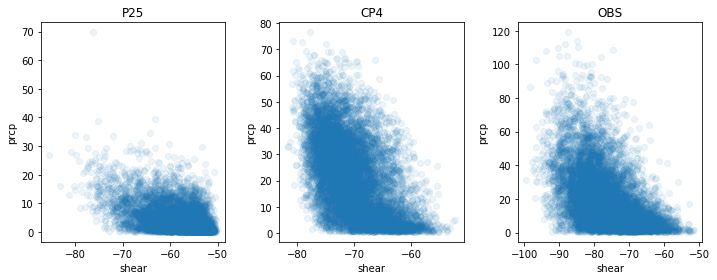

In [657]:
f = plt.figure(figsize=(10,4))
ax = f.add_subplot(131)
plt.xlabel('shear')
plt.ylabel('prcp')
plt.title('P25')
isq = cp25p.shear>0
isqq = cp4p.shear>0
plt.scatter(cp25p.where(isq).tmin, cp25p.where(isq).prcp, alpha=0.08)

ax = f.add_subplot(132)
plt.scatter(cp4p.where(isqq).tmin, cp4p.where(isqq).prcp, alpha=0.08)
plt.xlabel('shear')
plt.title('CP4')
plt.ylabel('prcp')
#ax.set_ylim(0,150)

ax = f.add_subplot(133)
isqq = obsp.shear>0
plt.scatter(obsp.where(isqq).tmin, obsp.where(isqq).prcp, alpha=0.08)
plt.xlabel('shear')
plt.title('OBS')
plt.ylabel('prcp')
#ax.set_ylim(0,150)
plt.tight_layout()

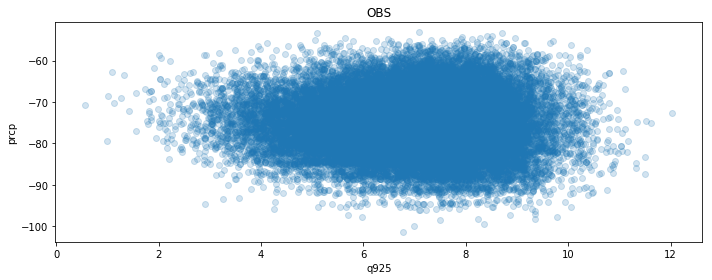

In [658]:
f = plt.figure(figsize=(10,4))
# ax = f.add_subplot(131)
# plt.xlabel('q925')
# plt.ylabel('prcp')
# plt.title('P25')
# isq = cp25p.q925>14
# isqq = cp4p.q925>14
# plt.scatter(cp25p.q925-cp25p.q700, cp25p.tmin, alpha=0.08)

# ax = f.add_subplot(132)
# plt.scatter(cp4p.q925-cp4p.q700, cp4p.tmin, alpha=0.08)
# plt.xlabel('q925')
# plt.title('CP4')
# plt.ylabel('prcp')
# ax.set_ylim(0,150)

ax = f.add_subplot(111)
plt.scatter(ds_march.q700, ds_march.tmin, alpha=0.2)
plt.xlabel('q925')
plt.title('OBS')
plt.ylabel('prcp')
#ax.set_ylim(0,150)
plt.tight_layout()

In [659]:
def density_plot(v1,v2,v3):
    xy = np.vstack([v1, v2])
    z = gaussian_kde(xy)(xy)
    data = z / (z.max() - z.min())

    r = u_stat.pcor(v1,v2,v3)
    r = stats.pearsonr(v1,v2)
    print('pears', stats.pearsonr(v1,v2))
    
    return data, r

In [660]:
def plot_scatter_month(dat):
    fig = plt.figure(figsize=(9, 5), dpi=100)
    cc=11
    ax1 = fig.add_subplot(221)

    data1, r1 = density_plot(dat.u650, dat.tmin, dat.q925)

    mappable = ax1.scatter(dat.u650, dat.tmin, c=data1, edgecolor='', cmap='viridis_r', s=20) # viridis_r
    ax1.set_ylabel('Min. T')
    ax1.set_xlabel('u925hPa')
    ax1.set_title('P-corr. shear/Tmin | q removed: '+str(np.round(r1[0], decimals=2)), fontsize=cc)
    ax1.tick_params(direction='in')
    cbar = fig.colorbar(mappable)
    cbar.set_label('Density')

    ####################################################################################
    ax2 = fig.add_subplot(222)

    data2, r2 = density_plot(dat.q925, dat.tmin, dat.shear)

    mappable = ax2.scatter(dat.q925, dat.tmin, c=data2, edgecolor='', cmap='viridis_r', s=15) # viridis_r
    ax2.set_xlim(13, 18)
    ax2.set_ylabel('Min T')
    ax2.set_xlabel('max. q925hPa')
    ax2.set_title('P-corr. tt/qq | shear removed: '+str(np.round(r2[0], decimals=2)), fontsize=cc)
    ax2.tick_params(direction='in')
    cbar = fig.colorbar(mappable)
    cbar.set_label('Density')

    ####################################################################################
    ax2 = fig.add_subplot(223)

    data3, r3 = density_plot(dat.q925, dat.shear, dat.u650)

    mappable = ax2.scatter(dat.q925, dat.shear, c=data3, edgecolor='', cmap='viridis_r', s=15) # viridis_r
    ax2.set_xlim(13, 18)
    ax2.set_ylabel('shear')
    ax2.set_xlabel('max. q925hPa')
    ax2.set_title('P-corr. qq/shear | umax removed: '+str(np.round(r3[0], decimals=2)), fontsize=cc)
    ax2.tick_params(direction='in')
    cbar = fig.colorbar(mappable)
    cbar.set_label('Density')

    ####################################################################################
    ax2 = fig.add_subplot(224)

    data4, r4 = density_plot(dat.q700, dat.tmin, dat.u925)

    mappable = ax2.scatter(dat.q700, dat.tmin , c=data4, edgecolor='', cmap='viridis_r', s=15) # viridis_r
    ax2.set_xlim(0, 10)
    ax2.set_ylabel('min T')
    ax2.set_xlabel('qmid')
    ax2.set_title('P-corr. qq700/tmin | u650hPa removed: '+str(np.round(r4[0], decimals=2)), fontsize=cc)
    ax2.tick_params(direction='in')
    cbar = fig.colorbar(mappable)
    cbar.set_label('Density')

    plt.tight_layout()



In [661]:
def plot_scatter_month_double(dat, dat2):
    fig = plt.figure(figsize=(9, 5), dpi=100)
    cc=11
    ax1 = fig.add_subplot(221)

    data1, r1 = density_plot(dat.shear, dat.tmin, dat.q925)

    mappable = ax1.scatter(dat.shear, dat.tmin, c=data1, edgecolor='', cmap='viridis_r', s=20) # viridis_r
    ax1.set_ylabel('Min. T')
    ax1.set_xlabel('u925hPa')
    ax1.set_title('P-corr. shear/Tmin | q removed: '+str(np.round(r1[0], decimals=2)), fontsize=cc)
    ax1.tick_params(direction='in')
    cbar = fig.colorbar(mappable)
    cbar.set_label('Density')

    ####################################################################################
    ax2 = fig.add_subplot(222)

    data2, r2 = density_plot(dat.q925, dat.tmin, dat.shear)

    mappable = ax2.scatter(dat.q925, dat.tmin, c=data2, edgecolor='', cmap='viridis_r', s=15) # viridis_r
    ax2.set_xlim(13, 20)
    ax2.set_ylabel('Min T')
    ax2.set_xlabel('max. q925hPa')
    ax2.set_title('P-corr. tt/qq | shear removed: '+str(np.round(r2[0], decimals=2)), fontsize=cc)
    ax2.tick_params(direction='in')
    cbar = fig.colorbar(mappable)
    cbar.set_label('Density')

    ####################################################################################
    ax1 = fig.add_subplot(223)

    data1, r1 = density_plot(dat2.shear, dat2.tmin, dat2.q925)

    mappable = ax1.scatter(dat2.shear, dat2.tmin, c=data1, edgecolor='', cmap='viridis_r', s=20) # viridis_r
    ax1.set_ylabel('Min. T')
    ax1.set_xlabel('u925hPa')
    ax1.set_title('P-corr. shear/Tmin | q removed: '+str(np.round(r1[0], decimals=2)), fontsize=cc)
    ax1.tick_params(direction='in')
    cbar = fig.colorbar(mappable)
    cbar.set_label('Density')

    ####################################################################################
    ax2 = fig.add_subplot(224)

    data2, r2 = density_plot(dat2.q925, dat2.tmin, dat2.shear)

    mappable = ax2.scatter(dat2.q925, dat2.tmin, c=data2, edgecolor='', cmap='viridis_r', s=15) # viridis_r
    ax2.set_xlim(13, 20)
    ax2.set_ylabel('Min T')
    ax2.set_xlabel('max. q925hPa')
    ax2.set_title('P-corr. tt/qq | shear removed: '+str(np.round(r2[0], decimals=2)), fontsize=cc)
    ax2.tick_params(direction='in')
    cbar = fig.colorbar(mappable)
    cbar.set_label('Density')

    plt.tight_layout()

pears (0.2718241574298161, 0.0)
pears (-0.20470428117543157, 9.38004330104e-313)
pears (0.20971269406770895, 0.0)
pears (-0.02517120685745054, 4.223412978646964e-06)


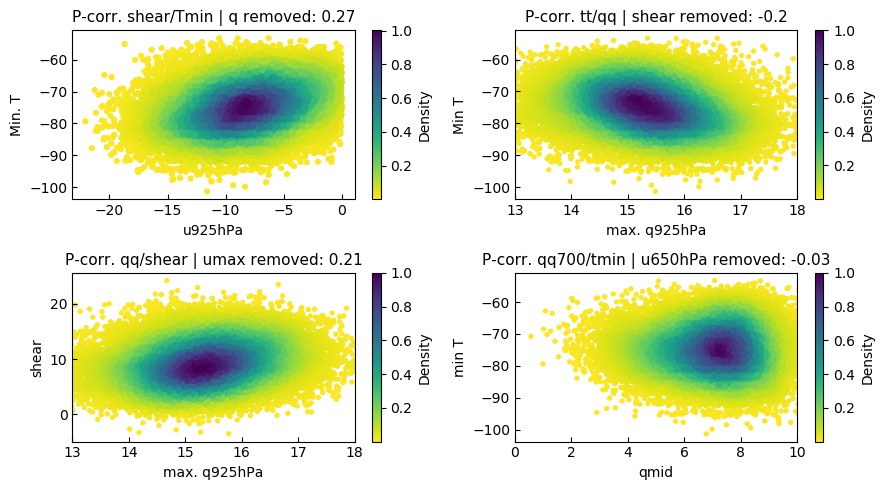

In [158]:
plot_scatter_month(ds_march)

In [792]:
alln=7
nbs= alln
nbq= alln
nba = alln

p1 = 5
p2 = 99

shearb_march = np.percentile(ds_march.shear[(ds_march.shear>=np.percentile(ds_march.shear,p1)) & (ds_march.shear<=np.percentile(ds_march.shear,p2))], np.linspace(0,100,nbs)) #np.percentile(ds_march.shear[(ds_march.shear>=3) & (ds_march.shear<=17)], np.linspace(0,100,nbs))
#shearb_march = np.percentile(obs_march.shear[(obs_march.shear>=np.percentile(obs_march.shear,p1)) & (obs_march.shear<=np.percentile(obs_march.shear,p2))], np.linspace(0,100,nbs)) #np.percentile(ds_march.shear[(ds_march.shear>=3) & (ds_march.shear<=17)], np.linspace(0,100,nbs))

shearc_march = np.percentile(cp4_march.shear[(cp4_march.shear>=np.percentile(cp4_march.shear,p1)) & (cp4_march.shear<=np.percentile(cp4_march.shear,p2))], np.linspace(0,100,nbs)) # np.percentile(cp4_march.shear[(cp4_march.shear>=8) & (cp4_march.shear<=20)], np.linspace(0,100,nbs))
shear25_march = np.percentile(cp25_march.shear[(cp25_march.shear>=np.percentile(cp25_march.shear,p1)) & (cp25_march.shear<=np.percentile(cp25_march.shear,p2))], np.linspace(0,100,nbs)) # np.percentile(cp25_march.shear[(cp4_march.shear>=8) & (cp25_march.shear<=20)], np.linspace(0,100,nbs))

# shearb_march = np.percentile(ds_march.shear[(ds_march.shear>=3) & (ds_march.shear<=17)], np.linspace(0,100,nbs))
# shearc_march = np.percentile(cp4_march.shear[(cp4_march.shear>=8) & (cp4_march.shear<=20)], np.linspace(0,100,nbs))
# shear25_march = np.percentile(cp25_march.shear[(cp4_march.shear>=8) & (cp25_march.shear<=20)], np.linspace(0,100,nbs))




abins = np.linspace(5000,250000, nba)
qbinsb_march = np.linspace(np.percentile(ds_march.q925, p1) , np.percentile(ds_march.q925, p2), nbq) 
#qbinsb_march = np.linspace(np.percentile(obs_march.q925, p1) , np.percentile(obs_march.q925, p2), nbq) 
qbinsc_march = np.linspace(np.percentile(cp4_march.q925, p1) , np.percentile(cp4_march.q925, p2), nbq)
qbinsc25_march = np.linspace(14 , np.percentile(cp25_march.q925, p2), nbq)

nbqq = 7
nbss = 7

p1 = 5#10
p2 = 99 #90

shear_obsp = np.percentile(obsp.shear[(obsp.shear>=np.percentile(obsp.shear,p1)) & (obsp.shear<=np.percentile(obsp.shear,p2))], np.linspace(0,100,nbss)) # np.percentile(cp25_march.shear[(cp4_march.shear>=8) & (cp25_march.shear<=20)], np.linspace(0,100,nbs))
#np.percentile(obsp.shear[(obsp.shear>=3) & (obsp.shear<=17)], np.linspace(0,100,nbss))
shear_cp4p = np.percentile(cp4p.shear[(cp4p.shear>=np.percentile(cp4p.shear,p1)) & (cp4p.shear<=np.percentile(cp4p.shear,p2))], np.linspace(0,100,nbss)) #np.percentile(cp4p.shear[(cp4p.shear>=8) & (cp4p.shear<=20)], np.linspace(0,100,nbss))
shear_cp25p = np.percentile(cp25p.shear[(cp25p.shear>=np.percentile(cp25p.shear,p1)) & (cp25p.shear<=np.percentile(cp25p.shear,p2))], np.linspace(0,100,nbss)) # np.percentile(cp25p.shear[(cp25p.shear>=8) & (cp25p.shear<=20)], np.linspace(0,100,nbss))

qbinso = np.linspace(np.percentile(obsp.q925, p1) , np.percentile(obsp.q925, p2), nbqq)
qbinsc= np.linspace(np.percentile(cp4p.q925, p1) , np.percentile(cp4p.q925, p2), nbqq)
qbinsc25 = np.linspace(14, np.percentile(cp25p.q925, p2), nbqq) # 15


Extreme rain 44.75290420610417


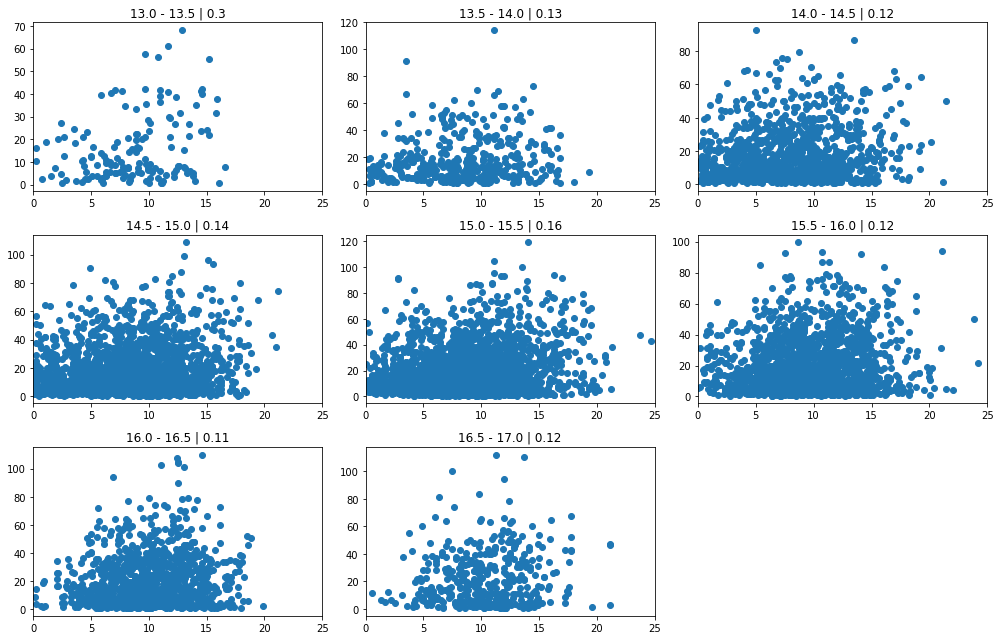

In [793]:
qbins_corr = np.percentile(obsp.q925, np.linspace(0,100,9))
qbins_corr = np.linspace(13,17,9)
extreme = np.percentile(obsp.prcp[obsp.prcp>1],90)
print('Extreme rain', extreme)
clist = []
f=plt.figure(figsize=(14,9))
for isq, qql in enumerate(qbins_corr[0:-1]):
        f.add_subplot(3,3,isq+1)
        poss_qq = (obsp.q925>=qql) & (obsp.q925 < qbins_corr[isq+1])
        plt.scatter(obsp.shear[poss_qq], obsp.prcp[poss_qq])
        ttslope = stats.pearsonr(obsp.shear[poss_qq], obsp.prcp[poss_qq])
        plt.xlim(0,25)
        #plt.ylim(0,120)
        plt.title(str(np.round(qql,2))+' - '+ str(np.round(qbins_corr[isq+1],2)) + ' | ' + str(np.round(ttslope[0],2)))
plt.tight_layout()
        

In [794]:
def create_2dhist(ds, xbins,ybins, precip=False):
#     sheardiff = shearbins[0:-1]+((xbins[1::]-shearbins[0:-1])/2)[0]
#     qdiff= qbins[0:-1] + ((qbins[1::]-qbins[0:-1])/2)[0]

    outperc_tt = np.zeros((len(ybins),len(xbins)))
    outperc_pp = np.zeros((len(ybins),len(xbins)))
    outval = np.zeros((len(ybins),len(xbins)))
    outarea_ds = np.zeros((len(ybins),len(xbins)))
    
    outprob =  np.zeros((len(ybins),len(xbins)))

    corrlist = []
    stdlist = []
    
    for isq, qql in enumerate(ybins[0:-1]):
        
        poss_qq = (ds.q925>=qql) & (ds.q925 < ybins[isq+1])
        if precip:
            cvar = ds.prcp
        else:
            cvar = ds.tmin
            
            
        try:
            #ttslope, intercept, rc, p, std_err = linregress(ds.shear[poss_qq],cvar[poss_qq])
            ttslope = stats.pearsonr(ds.shear[poss_qq],cvar[poss_qq])
            corrlist.append(ttslope) 
            #ds_amean = np.percentile(ds.area[poss_ds], 90)
        except IndexError:
            corrlist.append(np.nan)

        for issh, shl in enumerate(xbins[0:-1]):

            poss_ds = (ds.shear >= shl) & (ds.shear < xbins[issh+1]) & (ds.q925>=qql) & (ds.q925 < ybins[isq+1])
            
                             
            if precip:
                thresh = np.percentile(ds.prcp[ds.prcp>=0.1], 98)
                ttslope = np.sum(cvar[poss_ds] >=thresh) / np.sum(cvar>=0.1)
            else:

                thresh = np.percentile(ds.tmin, 2)
                ttslope = np.sum(cvar[poss_ds] <=thresh) / np.sum(cvar<=-50)

            outprob[issh,isq] = ttslope

                               
            try:
                #ds_mean = np.percentile(ds.tmin[poss_ds], 10)
                ds_mean = np.median(ds.tmin[poss_ds])
            except IndexError:
                ds_mean = np.nan
                
            try:
                #prcp_mean = np.percentile(ds.prcp[poss_ds], 90)
                prcp_mean = np.median(ds.prcp[poss_ds])
            except:
                prcp_mean = np.nan

            try:
                ds_amean = np.median(ds.area[poss_ds], 90)
                #ds_amean = np.percentile(ds.area[poss_ds], 90)
            except IndexError:
                ds_amean = np.nan
            


            outarea_ds[issh,isq] = ds_amean
            outperc_tt[issh,isq] = ds_mean
            outperc_pp[issh,isq] = prcp_mean

            outval[issh,isq] = np.sum(poss_ds)
            
    return outperc_tt, outperc_pp, outarea_ds, outval, corrlist

In [795]:
def hist2d_plot(data,xbins, ybins, vmin, vmax, valid=None):
    f = plt.figure()
    ax5 = f.add_subplot(111)
    X, Y = np.meshgrid(xbins,ybins)
    cmapp = uplot.discrete_cmap(8, base_cmap='RdBu_r')
    if valid is not None:
        data[valid<50] = np.nan
    Zm = ma.masked_where(np.isnan(data),data)

    mappable = ax5.pcolormesh(X, Y, Zm.T, cmap=cmapp, vmin=vmin, vmax=vmax) # viridis_rvmin=20, vmax=40
    #mappable = ax5.pcolormesh(X, Y, Zm.T, cmap=cmapp) # viridis_rvmin=20, vmax=40

    ax5.set_ylabel('Max. q925hPa')
    ax5.set_xlabel('Max. u925hPa (equally populated)')
    ax5.set_title('')
    cbar = f.colorbar(mappable, ticks=np.linspace(vmin,vmax,9)) # ticks=np.linspace(30,45,11) , ticks=np.linspace(20,40,11)
    cbar.set_label('90th centile max. rain')
    plt.show()

In [796]:
def hist2d_quatro(data, valid=False):
    f = plt.figure(figsize=(10,7))
    for i, dat in enumerate(data):
        ax = f.add_subplot(2,2,i+1)
      
        X, Y = np.meshgrid(dat['xbins'],dat['ybins'])
        cmapp = uplot.discrete_cmap(8, base_cmap='RdBu_r')
        if valid:
            
            dat['data'][dat['valid']<10] = np.nan
        Zm = ma.masked_where(np.isnan(dat['data']),dat['data'])
       
        mappable = ax.pcolormesh(X, Y, Zm.T, cmap=cmapp, vmin=dat['vmin'], vmax=dat['vmax']) # viridis_rvmin=20, vmax=40
        ax.set_ylabel(dat['ylabel'])
        ax.set_xlabel(dat['xlabel'])
        ax.set_title(dat['title'])
        cbar = f.colorbar(mappable, ticks=np.linspace(dat['vmin'],dat['vmax'],9)) # ticks=np.linspace(30,45,11) , ticks=np.linspace(20,40,11)
        cbar.set_label(dat['cbarlabel'])

    plt.tight_layout() 

In [797]:
def hist2d_six(data, valid=False):
    
    #from palettable.colorbrewer.qualitative import Blues_6, Reds_6_r
    
    f = plt.figure(figsize=(15,8))
    for i, dat in enumerate(data):
        ax = f.add_subplot(2,3,i+1)
        if i>2:
            cmap = 'Blues'
            cmapnum=6
        else:
            cmap = 'Reds_r'
            cmapnum=8
        X, Y = np.meshgrid(dat['xbins'],dat['ybins'])
        cmapp = uplot.discrete_cmap(cmapnum, base_cmap=cmap)
        if valid:
            
            dat['data'][dat['valid']<40] = np.nan
        Zm = ma.masked_where(np.isnan(dat['data']),dat['data'])
       
        mappable = ax.pcolormesh(X, Y, Zm.T, cmap=cmapp, vmin=dat['vmin'], vmax=dat['vmax']) # viridis_rvmin=20, vmax=40
        ax.set_ylabel(dat['ylabel'])
        ax.set_xlabel(dat['xlabel'])
        ax.set_title(dat['title'])
        cbar = f.colorbar(mappable, ticks=np.linspace(dat['vmin'],dat['vmax'],cmapnum+1)) # ticks=np.linspace(30,45,11) , ticks=np.linspace(20,40,11)
        cbar.set_label(dat['cbarlabel'])

    plt.tight_layout() 
    plt.savefig(cnst.network_data + 'figs/CLOVER/fig3_corrected_u925_cp4_13km.png')

In [798]:
dsperc_mar, dsp_mar, dsarea_mar, dsval_mar, corr_ds = create_2dhist(ds_march, shearb_march, qbinsb_march)

In [799]:
cp4perc_mar, cp4pr_mar, cp4area_mar, cp4val_mar, corr_cp4 = create_2dhist(cp4_march, shearc_march, qbinsc_march)

/home/ck/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [800]:
cp25perc_mar, pc25pr_mar, cp25area_mar, cp25val_mar, corr_cp25 = create_2dhist(cp25_march, shear25_march, qbinsc25_march)

In [801]:
cpobsperc, pcobs, obsarea, obsval, corr_pobs = create_2dhist(obsp, shear_obsp, qbinso, precip=True)
cp4perc, pc4, cp4area, cp4val, corr_pcp4 = create_2dhist(cp4p, shear_cp4p, qbinsc, precip=True)
cp25perc, pc25, cp25area, cp25val, corr_pcp25 = create_2dhist(cp25p, shear_cp25p, qbinsc25, precip=True)

In [802]:
print(ds_march.shear.mean())
print(ds_march.q925.mean())
corr_pobs

0.7769885926255703
15.283664499274778


[(0.08842900740958315, 0.008192946340343664),
 (0.1525314646305604, 5.652731709558705e-12),
 (0.1513457695810604, 7.481376055972859e-15),
 (0.10821090077104224, 2.415759769048505e-06),
 (0.10385422730386566, 0.0015621229776535074),
 (0.14098642417743926, 0.011064662418894228)]

In [803]:
pup = 100
pdown = 1
ds_mar_dic = {
    'data' : dsperc_mar,
    'ybins' : qbinsb_march,
    'xbins' : shearb_march,
    'title' : 'Observed',
    'valid' : dsval_mar,
    'cbarlabel' :'Median(Tmin)',
    'vmin' : np.percentile(dsperc_mar[(dsperc_mar!=0) & np.isfinite(dsperc_mar)],pdown),
    'vmax' : np.percentile(dsperc_mar[(dsperc_mar!=0) & np.isfinite(dsperc_mar)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}


In [804]:
cp4_mar_dic = {
    'data' : cp4perc_mar,
    'ybins' : qbinsc_march,
    'xbins' : shearc_march,
    'title' : 'CP4',
    'valid' : cp4val_mar,
    'cbarlabel' : 'Median(Tmin)',
    'vmin' : np.percentile(cp4perc_mar[(cp4perc_mar!=0) & np.isfinite(cp4perc_mar)],pdown),
    'vmax' : np.percentile(cp4perc_mar[(cp4perc_mar!=0) & np.isfinite(cp4perc_mar)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}


In [805]:
cp25_mar_dic = {
    'data' : cp25perc_mar,
    'ybins' : qbinsc25_march,
    'xbins' : shear25_march,
    'title' : 'P25',
    'valid' : cp25val_mar,
    'cbarlabel' : 'Median(Tmin)',
    'vmin' : np.percentile(cp25perc_mar[(cp25perc_mar!=0) & np.isfinite(cp25perc_mar)],pdown),
    'vmax' : np.percentile(cp25perc_mar[(cp25perc_mar!=0) & np.isfinite(cp25perc_mar)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}


In [806]:
pcobs[pcobs==0]=np.nan
obsp_dic = {
    'data' : pcobs,
    'ybins' : qbinso,
    'xbins' : shear_obsp,
    'title' : '',
    'valid' : obsval,
    'cbarlabel' : 'Median(Pmax)',
    'vmin' : np.percentile(pcobs[(pcobs>=1) & np.isfinite(pcobs)],pdown),
    'vmax' : np.percentile(pcobs[(pcobs>=1) & np.isfinite(pcobs)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}
pc4[pc4==0]=np.nan
cp4_dic = {
    'data' : pc4,
    'ybins' : qbinsc,
    'xbins' : shear_cp4p,
    'title' : '',
    'valid' : cp4val,
    'cbarlabel' : 'Median(Pmax)',
    'vmin' : np.percentile(pc4[(pc4>=1) & np.isfinite(pc4)],pdown),
    'vmax' : np.percentile(pc4[(pc4>=1) & np.isfinite(pc4)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}
pc25[pc25==0]=np.nan
cp25_dic = {
    'data' : pc25,
    'ybins' : qbinsc25,
    'xbins' : shear_cp25p,
    'title' : '',
    'valid' : cp25val,
    'cbarlabel' : 'Median(Pmax)',
    'vmin' : np.percentile(pc25[(pc25!=0) & np.isfinite(pc25)],pdown),
    'vmax' : np.percentile(pc25[(pc25!=0) & np.isfinite(pc25)],pup),
    'ylabel' : 'q925hPa',
    'xlabel' : '650-925hPa shear'
}

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater_equal
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater_equal


(array([1.000e+00, 2.000e+00, 1.600e+01, 3.900e+01, 1.540e+02, 3.350e+02,
        7.590e+02, 1.632e+03, 3.321e+03, 3.125e+03]),
 array([-65.99490949, -64.40235386, -62.80979823, -61.2172426 ,
        -59.62468696, -58.03213133, -56.4395757 , -54.84702006,
        -53.25446443, -51.6619088 , -50.06935316]),
 <a list of 10 Patch objects>)

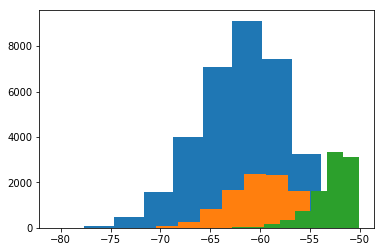

In [807]:
plt.hist(ds_march.tmean)
plt.hist(cp4_march.tmean)
plt.hist(cp25_march.tmean)

In [808]:
data_list = [ds_mar_dic, cp4_mar_dic, cp25_mar_dic,obsp_dic,cp4_dic,cp25_dic]

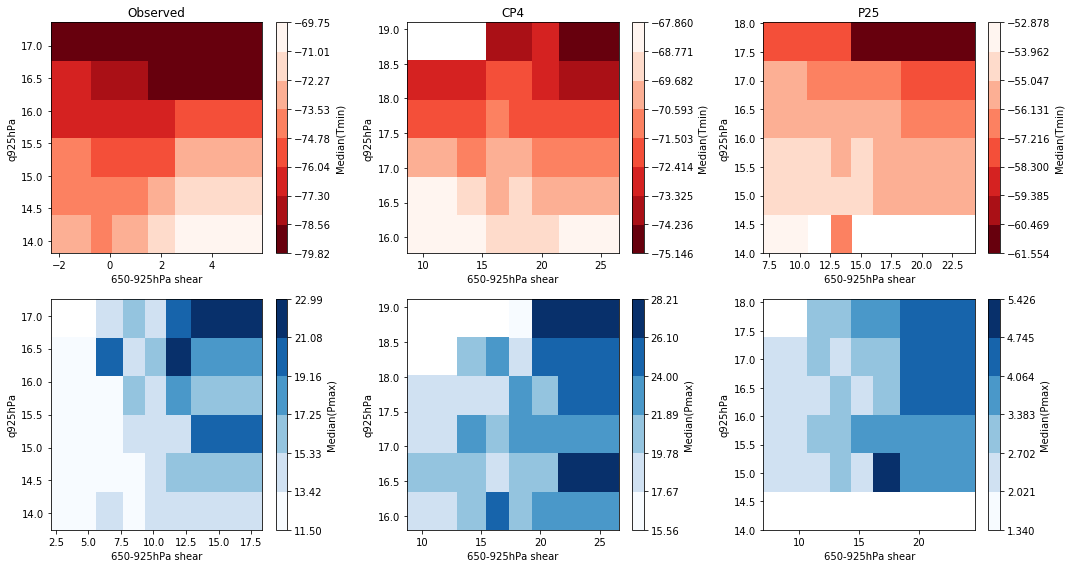

In [809]:
hist2d_six(data_list, valid=True)